In [1]:
from __future__ import absolute_import, division, print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train), torch.from_numpy(y_test)

In [3]:
num_classes = 10
num_features = 784
n_hidden_1 = 128

In [4]:
batch_size = 16

In [5]:
trainloader = []
for (i, j) in zip(x_train, y_train):
    trainloader.append([i, j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle = True, batch_size = batch_size)

testloader = []
for (i, j) in zip(x_test, y_test):
    testloader.append([i, j])
testloader = torch.utils.data.DataLoader(testloader, shuffle = False, batch_size = batch_size)

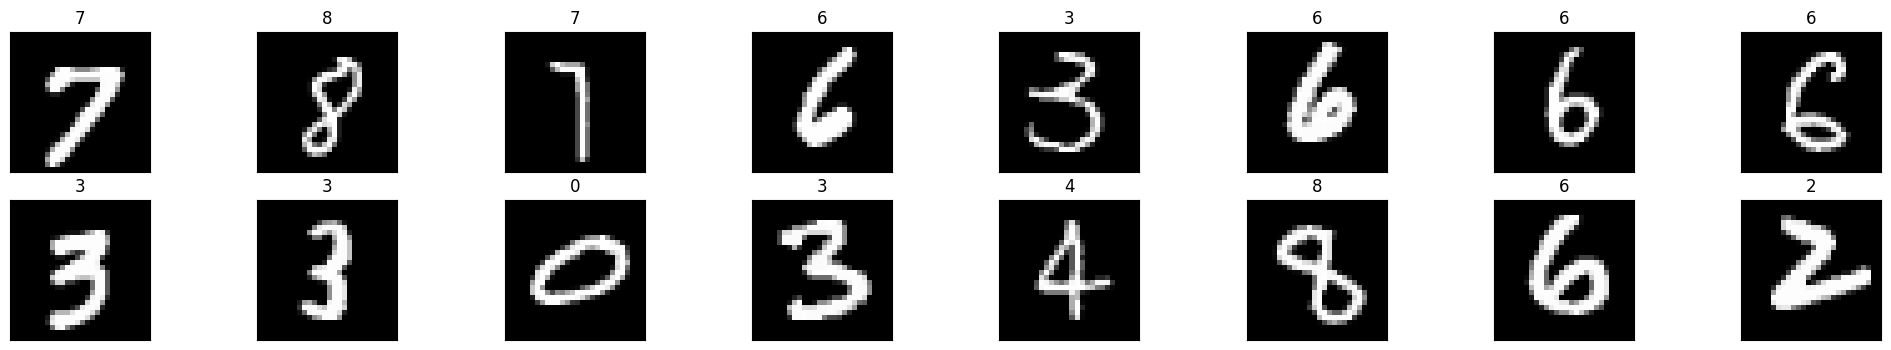

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

fig = plt.figure(figsize = (25, 4))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size // 2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(str(labels[idx].item()))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, num_classes)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
        
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [9]:
def accuracy():
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [ ]:
losses = []

for epoch in range(100):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    losses.append(running_loss)

    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished trainning')

Iteration: 10, accuracy: 0.979
Iteration: 20, accuracy: 0.981
Iteration: 30, accuracy: 0.982


In [ ]:
plt.plot([i for i in range(len(losses))], losses, label = 'Loss line')
plt.legend()
plt.show()